In [108]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

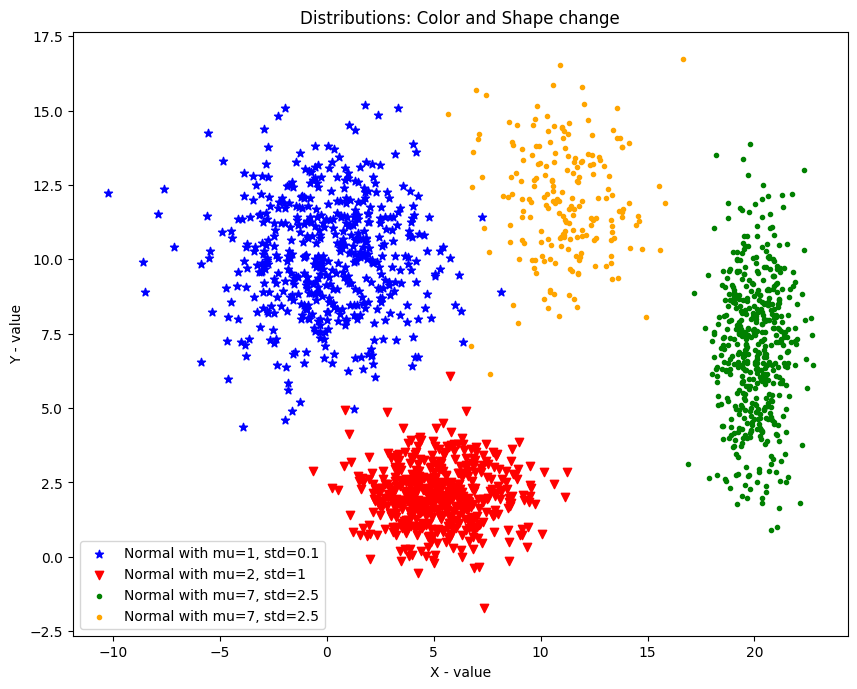

In [ ]:
# Scatterplot of different distributions. Color and Shape of Points.
x = np.random.randn(500)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
x1 = np.random.normal(0, 2.5, 500)
x2 = np.random.normal(5, 2, 500)
x3 = np.random.normal(20, 1, 500)
x4 = np.random.normal(11, 2, 200)

y1 = np.random.normal(10, 2, 500)
y2 = np.random.normal(2, 1, 500)
y3 = np.random.normal(7, 2.5, 500)
y4 = np.random.normal(12, 2, 200)

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x1,y1,color='blue', marker= '*', label='Normal with mu=1, std=0.1')
plt.scatter(x2,y2,color= 'red', marker='v', label='Normal with mu=2, std=1')
plt.scatter(x3,y3,color= 'green', marker='.', label='Normal with mu=7, std=2.5')
plt.scatter(x4,y4,color= 'orange', marker='.', label='Normal with mu=7, std=2.5')

# Decorate
plt.title('Distributions: Color and Shape change')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.legend(loc='best')
plt.show()

In [109]:
mu_x = np.random.randint(low=0, high=100) / 10.0
mu_x

7.7

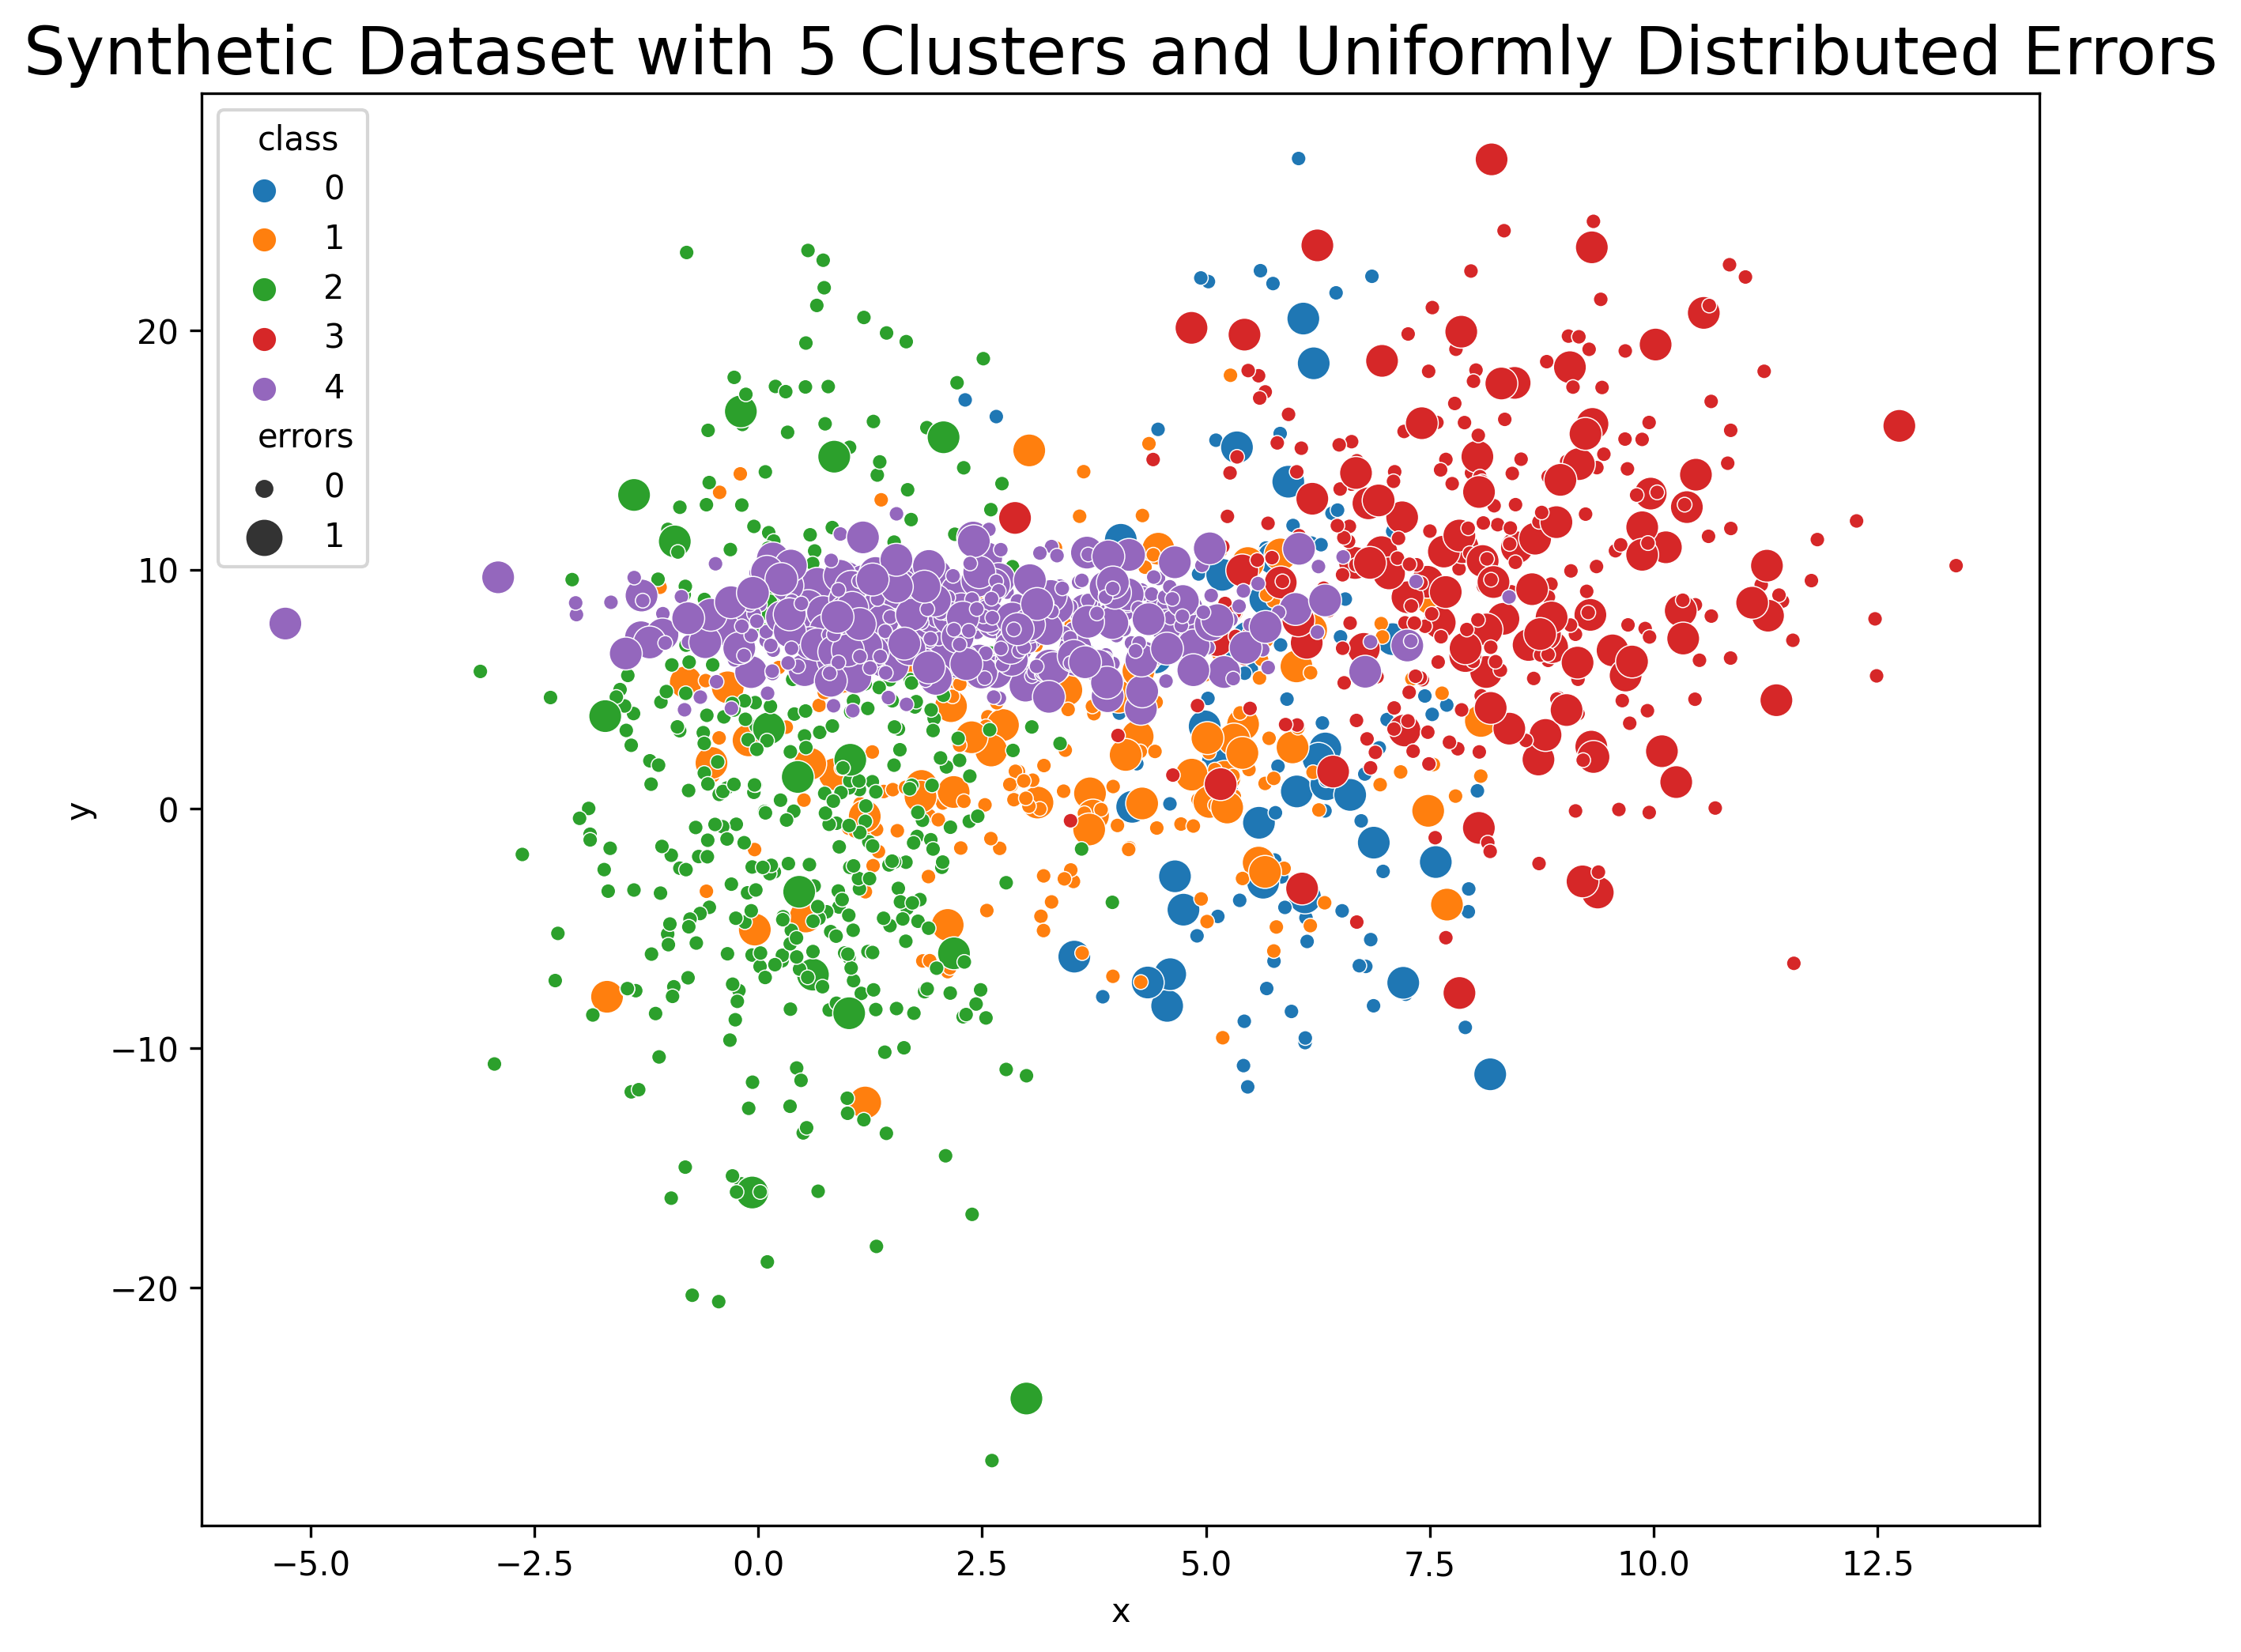

In [119]:
clusters = []
df = pd.DataFrame()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
for i in range(0,5):
    mu_x = np.random.randint(low=0, high=100) / 10.0
    mu_y = np.random.randint(low=0, high=100) / 10.0
    sd_x = np.random.randint(low=0, high=20)/ 10.0
    sd_y = np.random.randint(low=0,high=100) / 10.0
    size = np.random.randint(low=100, high=600)
    p = np.random.randint(low=0, high=100) / 200
    errors = np.random.choice(a = [0,1],size=size, p=[1 - p, p ])
    x = np.random.normal(mu_x, sd_x, size)
    y = np.random.normal(mu_y, sd_y, size)
    df = df.append(pd.DataFrame(data={'x':x,'y':y,'errors':errors,'class':np.full(size,i)}))
    #plt.scatter(x,y, label=f'Normal with mu=({mu_x},{mu_y}), std=({sd_x},{sd_y})')
scatterplot = sns.scatterplot(data=df, x='x', y='y', hue="class", size='errors', sizes=(100, 20), palette="tab10")
scatterplot.set_title('Synthetic Dataset with 5 Clusters and Uniformly Distributed Errors', size=20)
plt.show()  

No uniformly distributed errors

In [126]:
p = np.random.randint(low=0, high=100) / 200
p

0.17

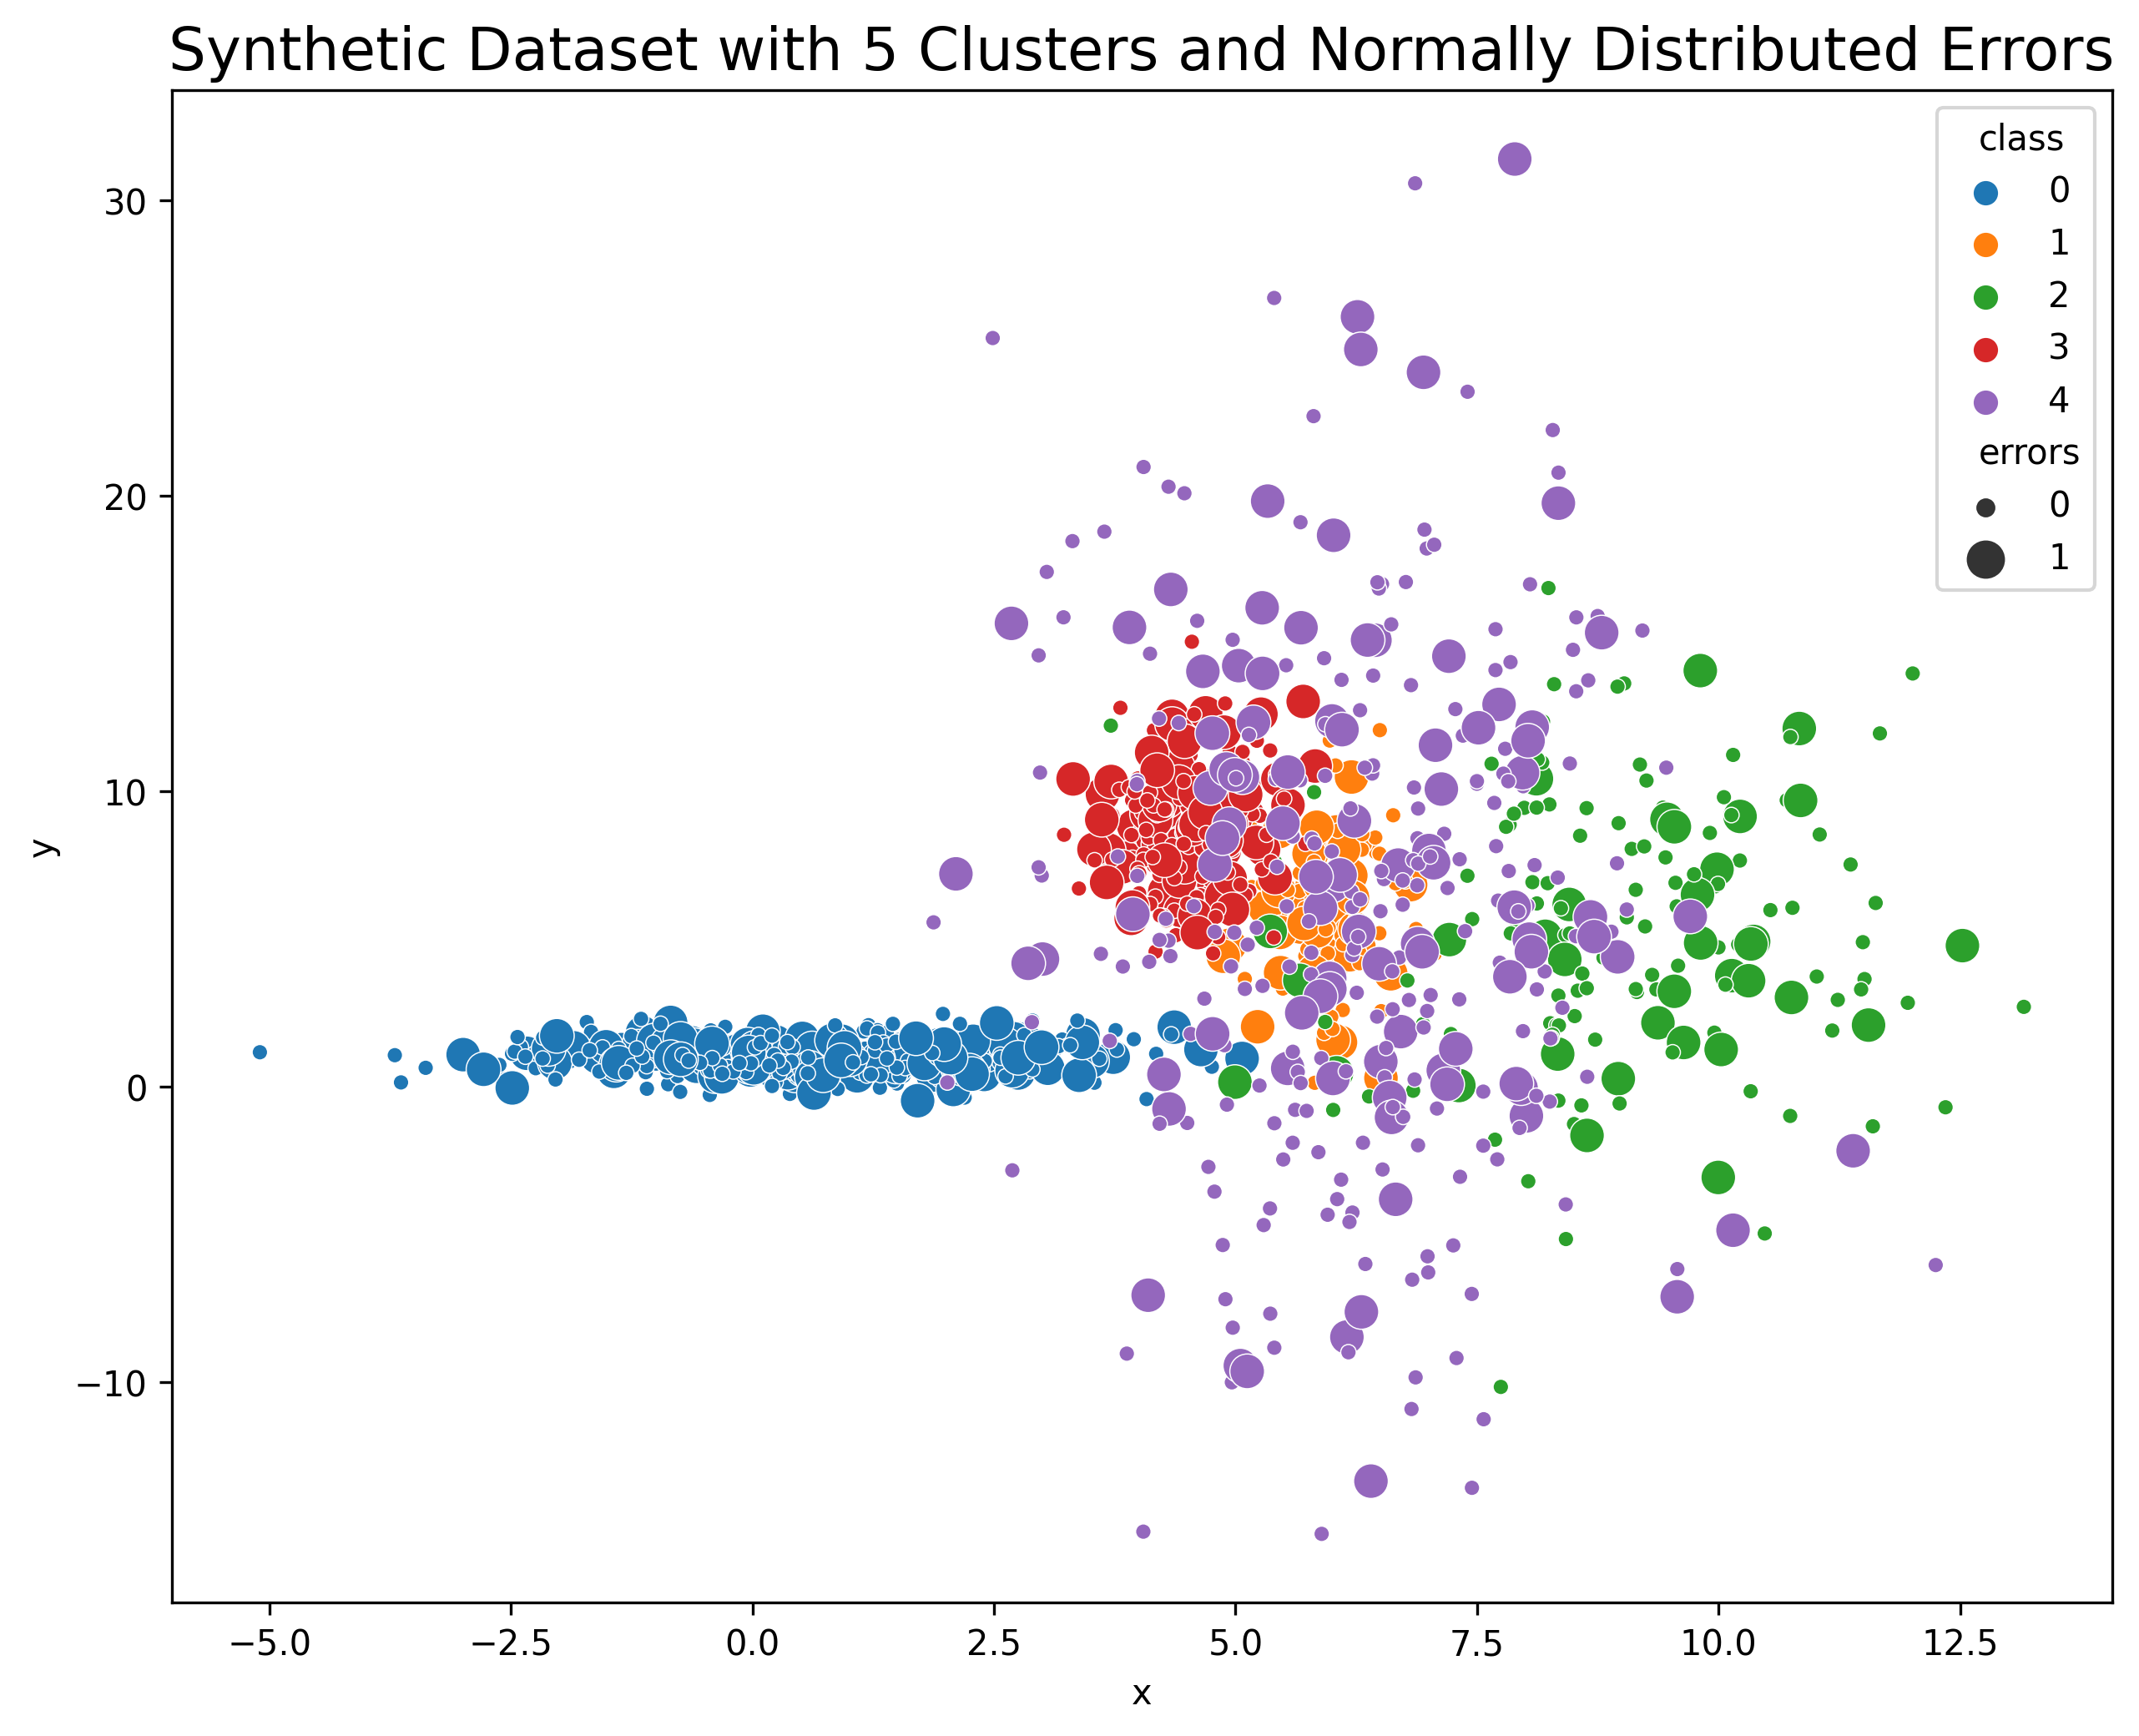

In [140]:
clusters = []
df = pd.DataFrame()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
for i in range(0,5):
    mu_x = np.random.randint(low=0, high=100) / 10.0
    mu_y = np.random.randint(low=0, high=100) / 10.0
    sd_x = np.random.randint(low=0, high=20)/ 10.0
    sd_y = np.random.randint(low=0,high=100) / 10.0
    size = np.random.randint(low=100, high=600)
    p = 0.27
    errors = np.random.choice(a = [0,1],size=size, p=[1 - p, p ])
    x = np.random.normal(mu_x, sd_x, size)
    y = np.random.normal(mu_y, sd_y, size)
    df = df.append(pd.DataFrame(data={'x':x,'y':y,'errors':errors,'class':np.full(size,i)}))
    #plt.scatter(x,y, label=f'Normal with mu=({mu_x},{mu_y}), std=({sd_x},{sd_y})')
scatterplot = sns.scatterplot(data=df, x='x', y='y', hue="class", size='errors', sizes=(100, 20), palette="tab10")
scatterplot.set_title('Synthetic Dataset with 5 Clusters and Normally Distributed Errors', size=17)
plt.show()  

In [169]:
# Adding simulated ground truth labels and predictions columns to df

df.head()

# number of errors
errors = len(df.loc[df['errors']==1])

# number of correct labels

correct = len(df.loc[df['errors'] == 0])
accuracy = correct/len(df)
print('accuracy:', accuracy)


accuracy: 0.7853126033741317


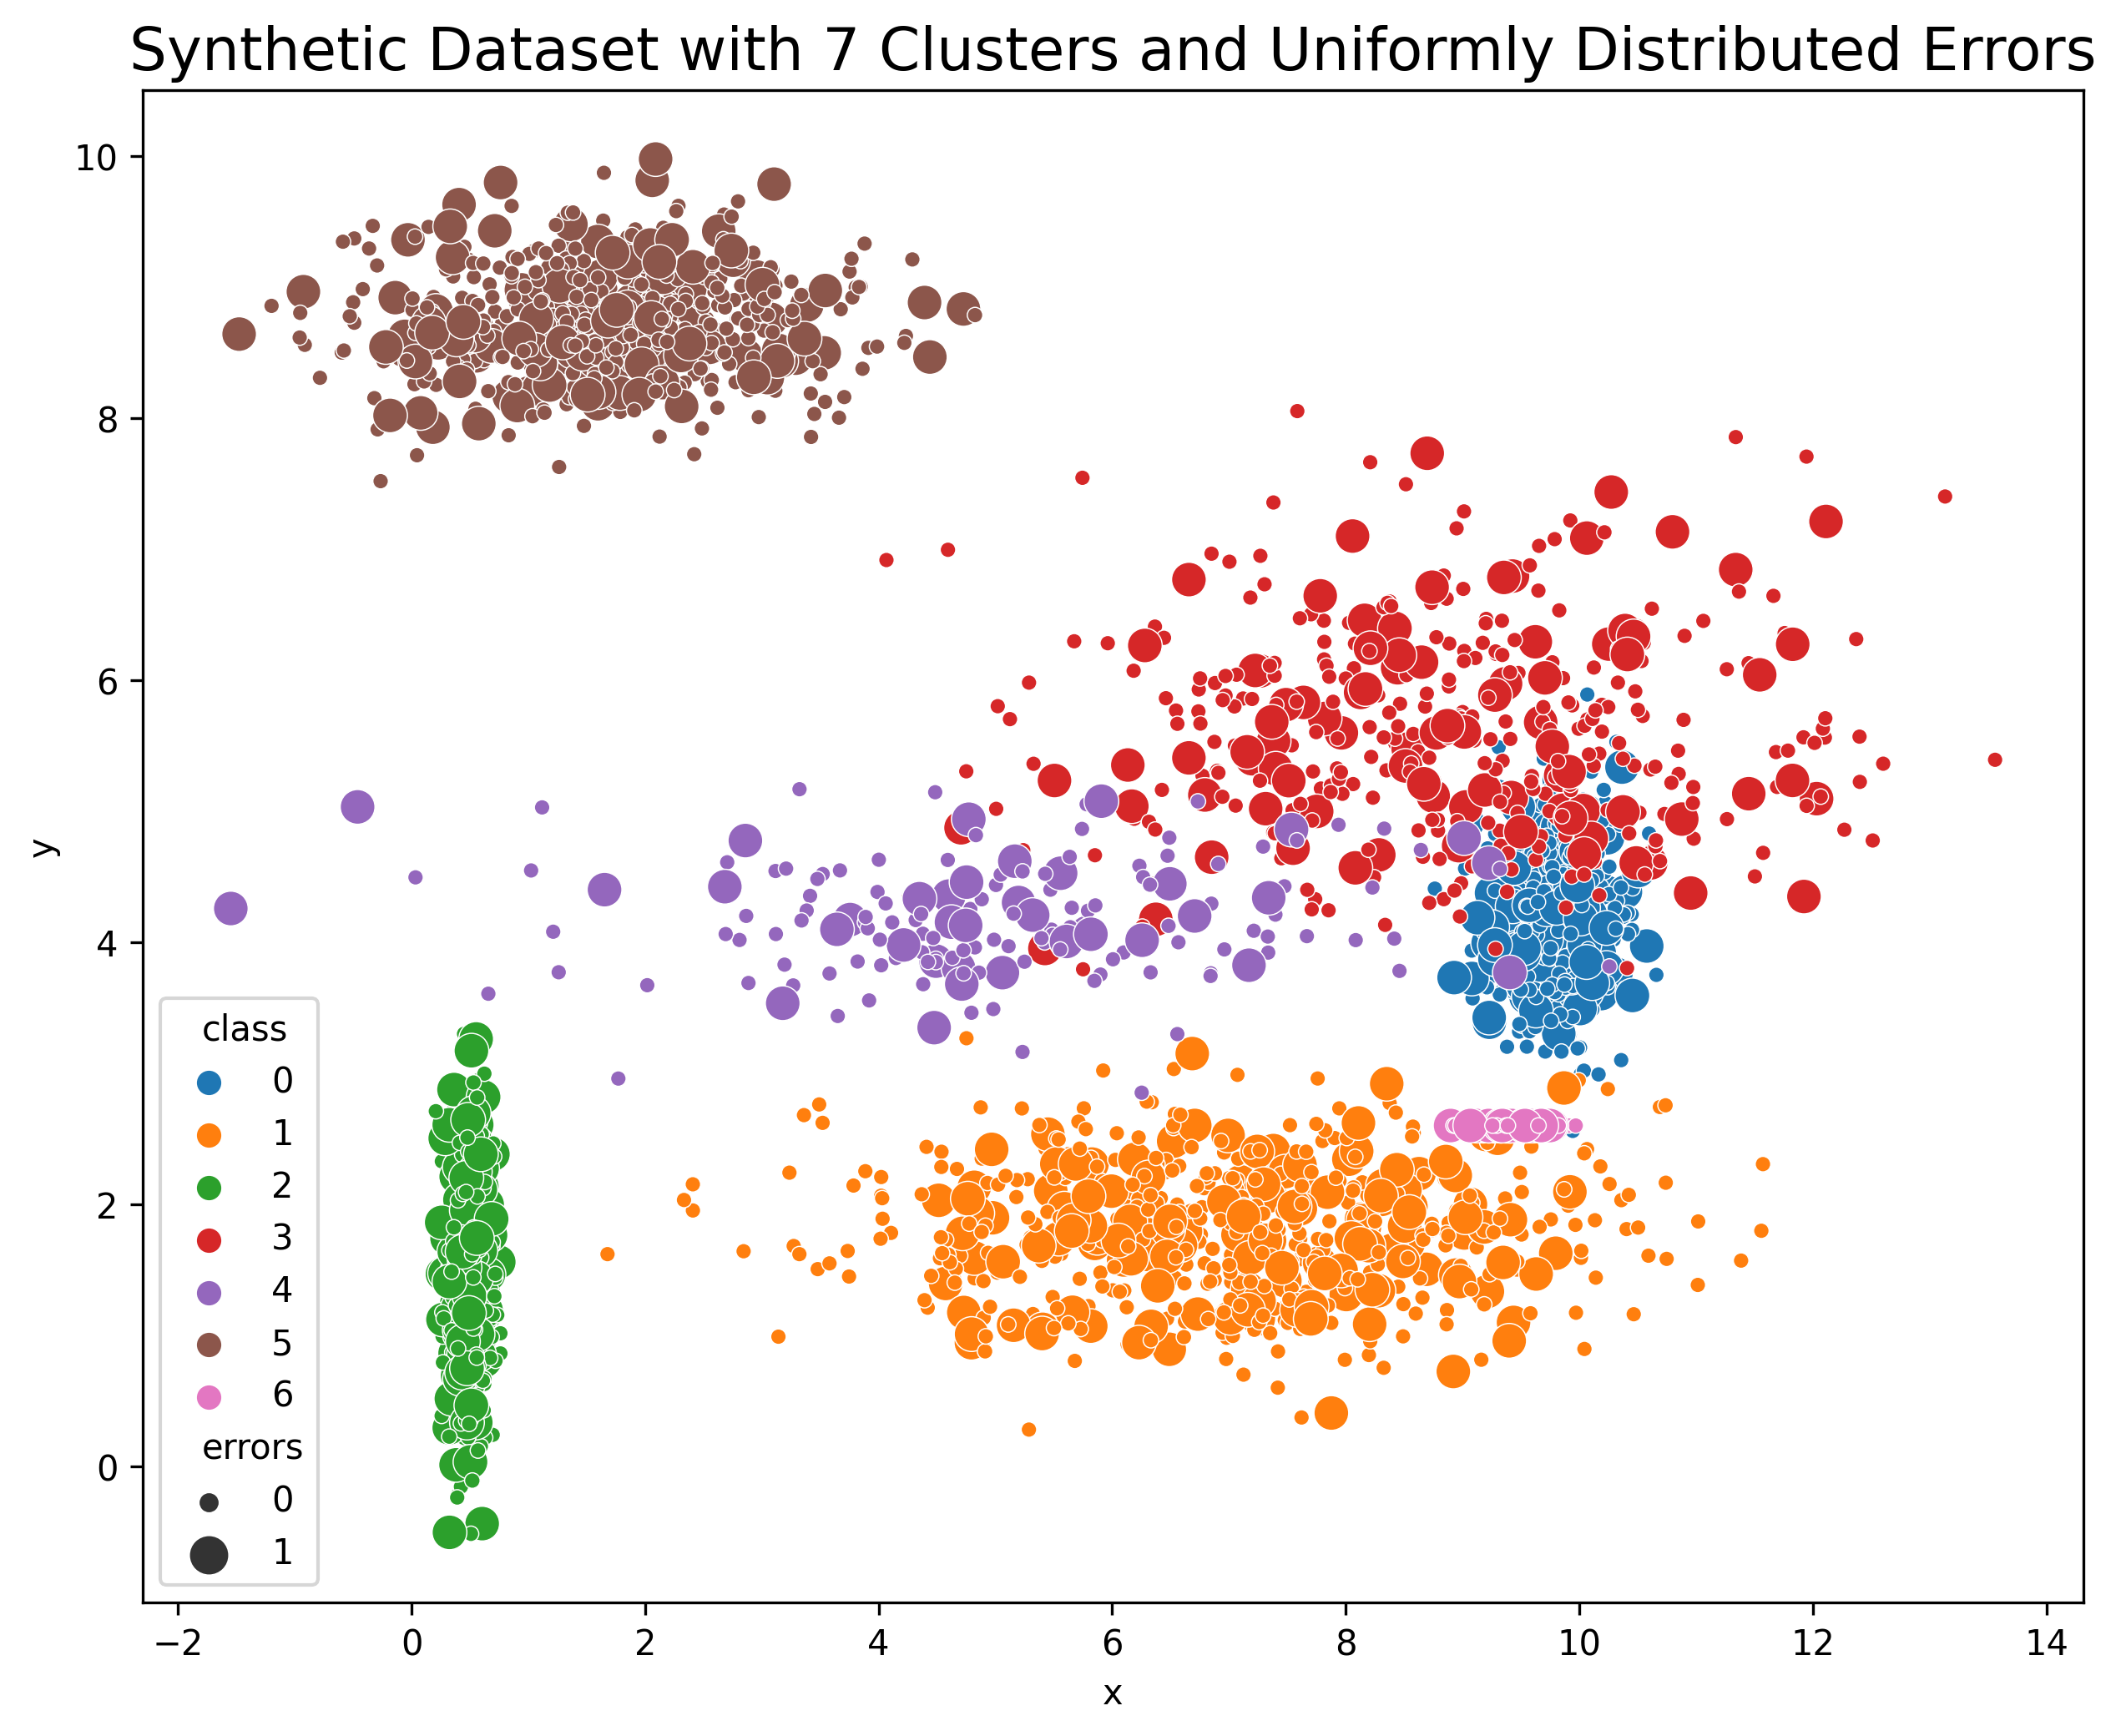

In [166]:
clusters = []
df = pd.DataFrame()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':300})
for i in range(0,7):
    mu_x = np.random.randint(low=0, high=100) / 10.0
    mu_y = np.random.randint(low=0, high=100) / 10.0
    sd_x = np.random.randint(low=0, high=20)/ 10.0
    sd_y = np.random.randint(low=0,high=10) / 10.0
    size = np.random.randint(low=100, high=600)
    p = 0.22
    errors = np.random.choice(a = [0,1],size=size, p=[1 - p, p ])
    x = np.random.normal(mu_x, sd_x, size)
    y = np.random.normal(mu_y, sd_y, size)
    df = df.append(pd.DataFrame(data={'x':x,'y':y,'errors':errors,'class':np.full(size,i)}))
    #plt.scatter(x,y, label=f'Normal with mu=({mu_x},{mu_y}), std=({sd_x},{sd_y})')
scatterplot = sns.scatterplot(data=df, x='x', y='y', hue="class", size='errors', sizes=(100, 20), palette="tab10")
scatterplot.set_title('Synthetic Dataset with 7 Clusters and Uniformly Distributed Errors', size=17)
plt.show()  


In [168]:
import os
path = r'..\\Preprocessed_datasets\\'
df.to_csv(os.path.join(path, r'synthetic_7clusters.csv'))